# Computer vision 2021 Assignment 3: image classification

This assignment contains 3 questions split across 2 notebooks. The first two questions, below, require you to complete and extend a simple 2D classifier.

# Question 1: Perceptron training algorithm (30%)

Below is the usual code to import libraries we need. You can modify it as needed.

In [47]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

from perceptron import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1. Starting from the boiler plate code provided in `perceptron.py`, implement the perceptron training algorithm as seen in the lecture. This perceptron takes a 2D point as input and classifies it as belonging to either class 0 or 1. By changing the `number_of_samples` parameter, different sample sizes can be generated for both classes.

You need the address the section of the code marked with **#TODO**

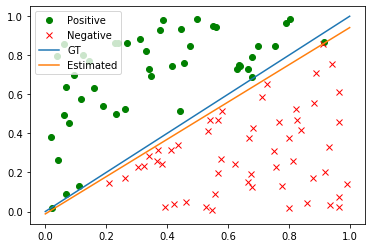

Qutting: Reached max iterations


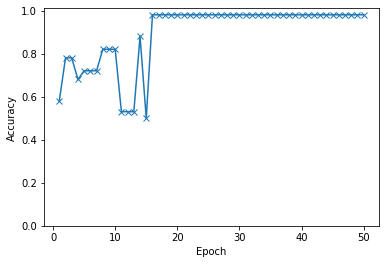

In [48]:
number_of_samples = 100
max_number_of_epochs = 50

X = np.random.rand(number_of_samples,2)

X = np.append(X, np.ones((X.shape[0],1)),axis = 1)

Y = X[:,1] > (X[:,0])

Y = np.float32(Y)

Y = Y.reshape((number_of_samples,1))

p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)

2. The code plots the ground-truth boundary between the two classes. We know this is the ground-truth because this is the boundary from which we generated data. However, even though the estimated line can correctly classify all the training samples, it might not agree with the ground-truth boundary. 
- Explain why this happens. 
- What is the potential disadvantage of such a decision boundary? 
- How could you change the training algorithm to reduce this disadvantage? (Implementation not required)

In [3]:
### Your answer here (use multiple cells if required, to answer any question in this assignment)

In [4]:
# Answer: 
# 3: Because of the loss function implemented on this example, it only has 2 boundries (1 and 0),we don't know how
#    serious the loss is. Since there is no distinct line that can separate these two classes, the estimated line 
#    will osciallate between these two classes no matter how huge the input size is. 

# 4: It can only classify linearly separable sets of vectors, if the data set is not linearly separable, then it
#    will never converged, hence we will never get an optimised result. 

# 5: We can use more complicated loss function to reduce this disadvantage and using an activataion function so that
#    the dataset is not lineraly separable anymore. 


3. In some training sessions, you might observe the boundary oscillating between two solutions and not reaching 100% accuracy. Discuss why this can happen and modify the training algorithm to correct this behaviour. We will call this the modified algorithm. (Hint: learning rate) 

In [5]:
### Your answer here

In [6]:
# As the learning rate is too big, it can lead to accuracy oscillate(jumping over and not 
# reach correct pattern ).
# Whereas,if the learning rate is too small, it can lead to slow convergence and not finding
# the correct answer ( stuck inside the wrong local minimum).
# One way to fix the above example would be to use a smaller learning rate.

4. Random initialization causes the algorithm to converge in different number of epochs. Execute the training algorithm on sample sizes of 10, 50, 500 and 5000. Report in a table the mean number of epochs required to converge for both the original and the modified algorithm. Which algorithm performs better and why? Is there a clear winner?

In [7]:
### Your answer here 

In [50]:
def PL(max_number_of_epochs):
    number_of_samples = 100
    max_number_of_epochs = max_number_of_epochs

    X = np.random.rand(number_of_samples,2)

    X = np.append(X, np.ones((X.shape[0],1)),axis = 1)

    Y = X[:,1] > (X[:,0])

    Y = np.float32(Y)

    Y = Y.reshape((number_of_samples,1))

    p = Perceptron(3)
    p.train(X,Y,max_number_of_epochs)

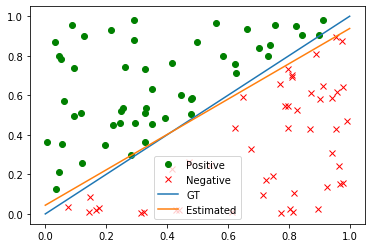

Qutting: Reached max iterations
Qutting: Converged


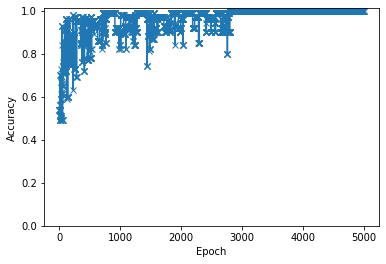

In [20]:

 PL(5000)
#              |    Original:             |    Modified: 
# size 10:     |    Did not converged     |    Did not converged 
# size 50:     |    Did not converged     |    47
# size 500:    |    Did not converged     |    200
# size 5000:   |    Did not converged     |    2,800

In [59]:
from tabulate import tabulate
table = [['size','Original','Modified'],[10,'Did not converged', 'Did not converged'],
         [50,'Did not converged', 47],[500,'Did not converged', '200'],[5000,'Did not converged', '2,800']]
print(tabulate(table,tablefmt = 'fancy_grid'))

╒══════╤═══════════════════╤═══════════════════╕
│ size │ Original          │ Modified          │
├──────┼───────────────────┼───────────────────┤
│ 10   │ Did not converged │ Did not converged │
├──────┼───────────────────┼───────────────────┤
│ 50   │ Did not converged │ 47                │
├──────┼───────────────────┼───────────────────┤
│ 500  │ Did not converged │ 200               │
├──────┼───────────────────┼───────────────────┤
│ 5000 │ Did not converged │ 2,800             │
╘══════╧═══════════════════╧═══════════════════╛


In [ ]:
#From the above example, we see that when using 50 epochs, it is most efficent because it converged when epoch 
# reaches 47. It converged faster than any of other algorithms, in real life situation it will have the best 
# computation efficiency. 

# Question 2: Multiclass classifier (30%)

Pat yourselves on the back, you have successfully trained a binary classifier. Now, its time to move to 3 classes. The dataset we are going on work on is shown below and contains three classes represented by different colors.

![](dataset3.png "3 class dataset.")

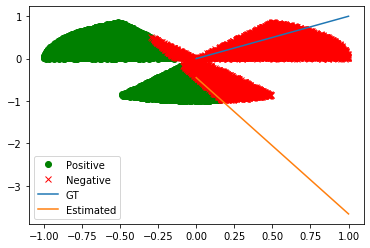

Qutting: Reached max iterations


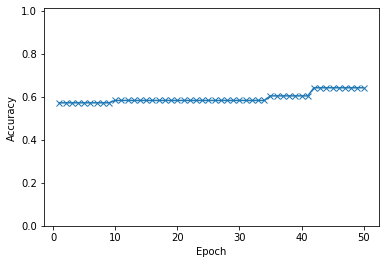

In [67]:
import scipy.io as sio

data = sio.loadmat('training_data.mat')
X = np.array(data['X'])

X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
Y = np.array(data['Y'])

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape)
p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)


1. Extend the algorithm developed in Question 1 to distinguish between the three classes. Discuss the modification that were needed to extend the functionality to 3 classes. (Hint: One vs. All classification)

In [10]:
# Your answer here
# I need to add one more class instead of 2,but don't know how to do so. 

2. By modifying the function `compute_train_accuracy`, plot the accuracy over time for the training data. Explain how you changed the accuracy measure for more than 2 classes. 

In [11]:
# Your output here
# We should manipulate with the learning rate on this question

3. Visualize the decision boundaries on the given dataset by implementing the draw() function for the modified algorithm and include it in your report. Based on your observation of the decision boundaries, discuss why a linear classifier is still the correct choice for this dataset.

In [34]:
# Your answer here 

# Because the boundaries is still linear, for example, for the red part, we can just use 
# one line to separate it from the other two classes, and same for the green and blue part
# If the problem is more complicated(not linear), then we can use activation function to 
# solve the problem.